In [113]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import math
import matplotlib.pyplot as plt
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

# import os
# for dirname, _, filenames in os.walk('/kaggle/input'):
#     for filename in filenames:
#         print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

# Loading the data

In [114]:
column_names = ['User_ID', 'MovieID', 'Rating', 'Timestamp']
ratings = pd.read_csv("ratings.dat", sep = "::", names = column_names, engine='python')
ratings = ratings.drop('Timestamp', axis = 1)
ratings.head()

,User_ID,MovieID,Rating
0,1,1193,5
1,1,661,3
2,1,914,3
3,1,3408,4
4,1,2355,5


In [115]:
column_names = ['MovieID', 'Title', 'Genres']
movies = pd.read_csv("movies.dat", sep = "::", names = column_names, encoding='latin-1', engine='python')
movies.head() 

,MovieID,Title,Genres
0,1,Toy Story (1995),Animation|Children's|Comedy
1,2,Jumanji (1995),Adventure|Children's|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama
4,5,Father of the Bride Part II (1995),Comedy


In [116]:
column_names = ['User_ID', 'Gender', 'Age', 'Occupation', 'Zip-code']
users = pd.read_csv("users.dat", sep = "::", names = column_names, engine='python')
users

,User_ID,Gender,Age,Occupation,Zip-code
0,1,F,1,10,48067
1,2,M,56,16,70072
2,3,M,25,15,55117
3,4,M,45,7,02460
4,5,M,25,20,55455
...,...,...,...,...,...
6035,6036,F,25,15,32603
6036,6037,F,45,1,76006
6037,6038,F,56,1,14706
6038,6039,F,45,0,01060


In [117]:
users["User_ID"].max()

6040

## Adding test user

In [118]:
#assumption that user ids are same as index for ease of implementation later on
row, col = users.shape
new_id = row + 1

new_data = [{'User_ID':new_id, 'Gender':'M', 'Age': 21, 'Occupation': 15, 'Zip-code': 45555}, {'User_ID':new_id+1, 'Gender':'M', 'Age': 21, 'Occupation': 15, 'Zip-code': 45555}, {'User_ID':new_id+2, 'Gender':'M', 'Age': 21, 'Occupation': 15, 'Zip-code': 45555}, {'User_ID':new_id+3, 'Gender':'M', 'Age': 21, 'Occupation': 15, 'Zip-code': 45555}, {'User_ID':new_id+4, 'Gender':'M', 'Age': 21, 'Occupation': 15, 'Zip-code': 45555}, {'User_ID':new_id+5, 'Gender':'M', 'Age': 21, 'Occupation': 15, 'Zip-code': 45555}]

for data in new_data:
    users.loc[len(users)] = data
    #print(users.loc[len(users) - 1])
    
users

,User_ID,Gender,Age,Occupation,Zip-code
0,1,F,1,10,48067
1,2,M,56,16,70072
2,3,M,25,15,55117
3,4,M,45,7,02460
4,5,M,25,20,55455
...,...,...,...,...,...
6041,6042,M,21,15,45555
6042,6043,M,21,15,45555
6043,6044,M,21,15,45555
6044,6045,M,21,15,45555


In [119]:
ratings["User_ID"].max()

6040

In [120]:
#Good movies good
new_data = [{'User_ID':new_id, 'MovieID': 6, 'Rating': 5}, {'User_ID':new_id, 'MovieID':593, 'Rating':4}, {'User_ID':new_id, 'MovieID':1, 'Rating':5}, {'User_ID':new_id, 'MovieID':47, 'Rating':4}, {'User_ID':new_id, 'MovieID':586, 'Rating':5}, {'User_ID':new_id, 'MovieID':589, 'Rating':4}, {'User_ID':new_id, 'MovieID':165, 'Rating':5}, {'User_ID':new_id, 'MovieID':2571, 'Rating':4}, {'User_ID':new_id, 'MovieID':3668, 'Rating':5}, {'User_ID':new_id, 'MovieID':1203, 'Rating':4}, {'User_ID':new_id, 'MovieID':858, 'Rating':5}, {'User_ID':new_id, 'MovieID':527, 'Rating':4},{'User_ID':new_id, 'MovieID':920, 'Rating':5}, {'User_ID':new_id, 'MovieID':1350, 'Rating':4}, {'User_ID':new_id, 'MovieID':1210, 'Rating':5}]
print(new_id)

for data in new_data:
    ratings.loc[len(ratings)] = data
    #print(ratings.loc[len(ratings) - 1])

new_id += 1

6041


In [121]:
#Good movies good and bad movies bad
new_data = [{'User_ID':new_id, 'MovieID': 6, 'Rating': 5}, {'User_ID':new_id, 'MovieID':593, 'Rating':4}, {'User_ID':new_id, 'MovieID':1, 'Rating':5}, {'User_ID':new_id, 'MovieID':47, 'Rating':4}, {'User_ID':new_id, 'MovieID':586, 'Rating':5}, {'User_ID':new_id, 'MovieID':589, 'Rating':4}, {'User_ID':new_id, 'MovieID':165, 'Rating':5}, {'User_ID':new_id, 'MovieID':2571, 'Rating':4}, {'User_ID':new_id, 'MovieID':3668, 'Rating':5}, {'User_ID':new_id, 'MovieID':1203, 'Rating':4}, {'User_ID':new_id, 'MovieID':858, 'Rating':5}, {'User_ID':new_id, 'MovieID':527, 'Rating':4},{'User_ID':new_id, 'MovieID':920, 'Rating':5}, {'User_ID':new_id, 'MovieID':1350, 'Rating':4}, {'User_ID':new_id, 'MovieID':1210, 'Rating':5},{'User_ID':new_id, 'MovieID': 172, 'Rating': 1}, {'User_ID':new_id, 'MovieID':1389, 'Rating':2}, {'User_ID':new_id, 'MovieID':1562, 'Rating':1}, {'User_ID':new_id, 'MovieID':2145, 'Rating':2}, {'User_ID':new_id, 'MovieID':1888, 'Rating':3}, {'User_ID':new_id, 'MovieID':2724, 'Rating':1}, {'User_ID':new_id, 'MovieID':3287, 'Rating':2}, {'User_ID':new_id, 'MovieID':3315, 'Rating':1}, {'User_ID':new_id, 'MovieID':3718, 'Rating':2}, {'User_ID':new_id, 'MovieID':56, 'Rating':1}, {'User_ID':new_id, 'MovieID':320, 'Rating':2}, {'User_ID':new_id, 'MovieID':427, 'Rating':1}, {'User_ID':new_id, 'MovieID':512, 'Rating':1}, {'User_ID':new_id, 'MovieID':516, 'Rating':2}, {'User_ID':new_id, 'MovieID':967, 'Rating':1}]
print(new_id)

for data in new_data:
    ratings.loc[len(ratings)] = data
    #print(ratings.loc[len(ratings) - 1])

new_id += 1

6042


In [122]:
# Good movies bad and bad movies good
new_data = [{'User_ID':new_id, 'MovieID': 6, 'Rating': 1}, {'User_ID':new_id, 'MovieID':593, 'Rating':2}, {'User_ID':new_id, 'MovieID':1, 'Rating':1}, {'User_ID':new_id, 'MovieID':47, 'Rating':2}, {'User_ID':new_id, 'MovieID':586, 'Rating':1}, {'User_ID':new_id, 'MovieID':589, 'Rating':2}, {'User_ID':new_id, 'MovieID':165, 'Rating':1}, {'User_ID':new_id, 'MovieID':2571, 'Rating':2}, {'User_ID':new_id, 'MovieID':3668, 'Rating':1}, {'User_ID':new_id, 'MovieID':1203, 'Rating':2}, {'User_ID':new_id, 'MovieID':858, 'Rating':1}, {'User_ID':new_id, 'MovieID':527, 'Rating':2},{'User_ID':new_id, 'MovieID':920, 'Rating':1}, {'User_ID':new_id, 'MovieID':1350, 'Rating':2}, {'User_ID':new_id, 'MovieID':1210, 'Rating':1}, {'User_ID':new_id, 'MovieID': 172, 'Rating': 5}, {'User_ID':new_id, 'MovieID':1389, 'Rating':4}, {'User_ID':new_id, 'MovieID':1562, 'Rating':5}, {'User_ID':new_id, 'MovieID':2145, 'Rating':4}, {'User_ID':new_id, 'MovieID':1888, 'Rating':5}, {'User_ID':new_id, 'MovieID':2724, 'Rating':4}, {'User_ID':new_id, 'MovieID':3287, 'Rating':5}, {'User_ID':new_id, 'MovieID':3315, 'Rating':4}, {'User_ID':new_id, 'MovieID':3718, 'Rating':5}, {'User_ID':new_id, 'MovieID':56, 'Rating':4}, {'User_ID':new_id, 'MovieID':320, 'Rating':5}, {'User_ID':new_id, 'MovieID':427, 'Rating':4}, {'User_ID':new_id, 'MovieID':512, 'Rating':5}, {'User_ID':new_id, 'MovieID':516, 'Rating':4}, {'User_ID':new_id, 'MovieID':967, 'Rating':5}]
print(new_id)

for data in new_data:
    ratings.loc[len(ratings)] = data
    #print(ratings.loc[len(ratings) - 1])

new_id += 1

6043


In [123]:
# #Bad movies bad
new_data = [{'User_ID':new_id, 'MovieID': 172, 'Rating': 1}, {'User_ID':new_id, 'MovieID':1389, 'Rating':2}, {'User_ID':new_id, 'MovieID':1562, 'Rating':1}, {'User_ID':new_id, 'MovieID':2145, 'Rating':2}, {'User_ID':new_id, 'MovieID':1888, 'Rating':3}, {'User_ID':new_id, 'MovieID':2724, 'Rating':1}, {'User_ID':new_id, 'MovieID':3287, 'Rating':2}, {'User_ID':new_id, 'MovieID':3315, 'Rating':1}, {'User_ID':new_id, 'MovieID':3718, 'Rating':2}, {'User_ID':new_id, 'MovieID':56, 'Rating':1}, {'User_ID':new_id, 'MovieID':320, 'Rating':2}, {'User_ID':new_id, 'MovieID':427, 'Rating':1}, {'User_ID':new_id, 'MovieID':512, 'Rating':1}, {'User_ID':new_id, 'MovieID':516, 'Rating':2}, {'User_ID':new_id, 'MovieID':967, 'Rating':1}]
print(new_id)

for data in new_data:
    ratings.loc[len(ratings)] = data
    #print(ratings.loc[len(ratings) - 1])

new_id += 1

6044


In [124]:
# Bad movies good
new_data = [{'User_ID':new_id, 'MovieID': 172, 'Rating': 5}, {'User_ID':new_id, 'MovieID':1389, 'Rating':4}, {'User_ID':new_id, 'MovieID':1562, 'Rating':5}, {'User_ID':new_id, 'MovieID':2145, 'Rating':4}, {'User_ID':new_id, 'MovieID':1888, 'Rating':5}, {'User_ID':new_id, 'MovieID':2724, 'Rating':4}, {'User_ID':new_id, 'MovieID':3287, 'Rating':5}, {'User_ID':new_id, 'MovieID':3315, 'Rating':4}, {'User_ID':new_id, 'MovieID':3718, 'Rating':5}, {'User_ID':new_id, 'MovieID':56, 'Rating':4}, {'User_ID':new_id, 'MovieID':320, 'Rating':5}, {'User_ID':new_id, 'MovieID':427, 'Rating':4}, {'User_ID':new_id, 'MovieID':512, 'Rating':5}, {'User_ID':new_id, 'MovieID':516, 'Rating':4}, {'User_ID':new_id, 'MovieID':967, 'Rating':5}]
print(new_id)

for data in new_data:
    ratings.loc[len(ratings)] = data
    #print(ratings.loc[len(ratings) - 1])

new_id += 1

6045


In [125]:
# shlok
new_data = [{'User_ID':new_id, 'MovieID': 47, 'Rating': 5}, {'User_ID':new_id, 'MovieID':111, 'Rating':4}, {'User_ID':new_id, 'MovieID':123, 'Rating':5}, {'User_ID':new_id, 'MovieID':215, 'Rating':5}, {'User_ID':new_id, 'MovieID':260, 'Rating':3}, {'User_ID':new_id, 'MovieID':296, 'Rating':5}, {'User_ID':new_id, 'MovieID':318, 'Rating':5}, {'User_ID':new_id, 'MovieID':541, 'Rating':5}, {'User_ID':new_id, 'MovieID':924, 'Rating':5}, {'User_ID':new_id, 'MovieID':1221, 'Rating':5}, {'User_ID':new_id, 'MovieID':1237, 'Rating':4}]
print(new_id)

for data in new_data:
    ratings.loc[len(ratings)] = data
    #print(ratings.loc[len(ratings) - 1])

6046


In [126]:
ratings["User_ID"].max()

6046

In [127]:
movies[['Genre 1', 'Genre 2', 'Genre 3', 'Genre 4', 'Genre 5', 'Genre 6']] = movies.Genres.str.split("|",expand=True)
movies.drop('Genres', axis=1, inplace=True)
movies.head()

,MovieID,Title,Genre 1,Genre 2,Genre 3,Genre 4,Genre 5,Genre 6
0,1,Toy Story (1995),Animation,Children's,Comedy,None,None,None
1,2,Jumanji (1995),Adventure,Children's,Fantasy,None,None,None
2,3,Grumpier Old Men (1995),Comedy,Romance,None,None,None,None
3,4,Waiting to Exhale (1995),Comedy,Drama,None,None,None,None
4,5,Father of the Bride Part II (1995),Comedy,None,None,None,None,None


# EDA

In [128]:
movieset = pd.merge(movies, ratings, on = 'MovieID')
movieset.sort_values("User_ID", ascending = False, inplace = True)
movieset

,MovieID,Title,Genre 1,Genre 2,Genre 3,Genre 4,Genre 5,Genre 6,User_ID,Rating
149849,541,Blade Runner (1982),Film-Noir,Sci-Fi,None,None,None,None,6046,5
22902,47,Seven (Se7en) (1995),Crime,Thriller,None,None,None,None,6046,5
336093,1237,"Seventh Seal, The (Sjunde inseglet, Det) (1957)",Drama,None,None,None,None,None,6046,4
57115,215,Before Sunrise (1995),Drama,Romance,None,None,None,None,6046,5
38944,123,Chungking Express (1994),Drama,Mystery,Romance,None,None,None,6046,5
...,...,...,...,...,...,...,...,...,...,...
185781,720,Wallace & Gromit: The Best of Aardman Animatio...,Animation,None,None,None,None,None,1,3
719704,2687,Tarzan (1999),Animation,Children's,None,None,None,None,1,3
273678,1097,E.T. the Extra-Terrestrial (1982),Children's,Drama,Fantasy,Sci-Fi,None,None,1,4
190488,745,"Close Shave, A (1995)",Animation,Comedy,Thriller,None,None,None,1,3


In [129]:
most_rated_movies = movieset.groupby('Title').size().sort_values(ascending = False)
most_rated_movies[:5]

Title
American Beauty (1999)                                   3428
Star Wars: Episode IV - A New Hope (1977)                2992
Star Wars: Episode V - The Empire Strikes Back (1980)    2990
Star Wars: Episode VI - Return of the Jedi (1983)        2886
Jurassic Park (1993)                                     2672
dtype: int64

In [130]:
popular_movies = movieset.groupby('Title')['Rating'].mean().sort_values(ascending = False)
popular_movies.head()

Title
Lured (1947)               5.0
Follow the Bitch (1998)    5.0
Baby, The (1973)           5.0
Smashing Time (1967)       5.0
Song of Freedom (1936)     5.0
Name: Rating, dtype: float64

The problem with the above method is that some movies get really good ratings (like 5 or 4 stars), but not many people actually watch them. So, just looking at the ratings and sorting movies that way might make it seem like these less-watched movies are super popular, which is not accurate. The data shows that this happens quite a bit, showing that sorting only by ratings doesn't always give a true picture of the most popular movies. So let's add a number of ratings attribute for each movie.

In [131]:
movie_ratings = pd.DataFrame(movieset.groupby('Title')['Rating'].mean())
movie_ratings['Number of Ratings'] = movieset.groupby('Title')['Rating'].count()
movie_ratings.head()

,Rating,Number of Ratings
Title,,
"$1,000,000 Duck (1971)",3.027027,37
'Night Mother (1986),3.371429,70
'Til There Was You (1997),2.692308,52
"'burbs, The (1989)",2.910891,303
...And Justice for All (1979),3.713568,199


## Plot of Number of Number of ratings per movie

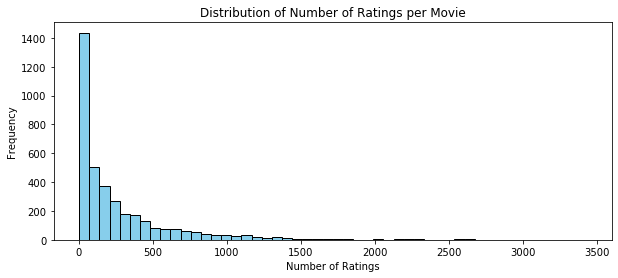

In [132]:
plt.figure(figsize=(10, 4))
plt.hist(movie_ratings['Number of Ratings'], bins=50, color='skyblue', edgecolor='black')
plt.xlabel('Number of Ratings')
plt.ylabel('Frequency')
plt.title('Distribution of Number of Ratings per Movie')
plt.show()

## Average Ratings of movies

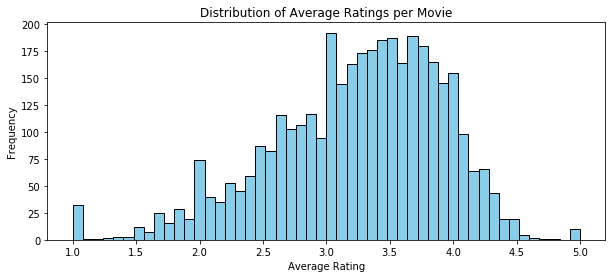

In [133]:
plt.figure(figsize=(10, 4))
plt.hist(movie_ratings['Rating'], bins=50, color='skyblue', edgecolor='black')
plt.xlabel('Average Rating')
plt.ylabel('Frequency')
plt.title('Distribution of Average Ratings per Movie')
plt.show()

In [134]:
max_ratings = movie_ratings['Number of Ratings'].max()
max_ratings

3428

In [135]:
ratings

,User_ID,MovieID,Rating
0,1,1193,5
1,1,661,3
2,1,914,3
3,1,3408,4
4,1,2355,5
...,...,...,...
1000320,6046,318,5
1000321,6046,541,5
1000322,6046,924,5
1000323,6046,1221,5


## Count of each rating score

Text(0, 0.5, 'number of ratings')

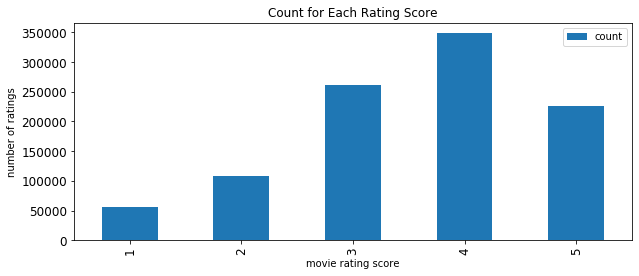

In [136]:
column_names = ['User_ID', 'MovieID', 'Rating', 'Timestamp']
ratings_tmp = pd.read_csv("ratings.dat", sep = "::", names = column_names, engine='python')
rating_count_df = pd.DataFrame(ratings_tmp.groupby(['Rating']).size(), columns=['count'])
ax = rating_count_df.reset_index().rename(columns={'index': 'rating score'}).plot('Rating','count', 'bar',
    figsize=(10, 4),
    title='Count for Each Rating Score',
    fontsize=12)

ax.set_xlabel("movie rating score")
ax.set_ylabel("number of ratings")

We can observe that most of the users have rewarded movies they watched with a 4 star rating and followed by 3 star and 5 star.

In [137]:
ratings

,User_ID,MovieID,Rating
0,1,1193,5
1,1,661,3
2,1,914,3
3,1,3408,4
4,1,2355,5
...,...,...,...
1000320,6046,318,5
1000321,6046,541,5
1000322,6046,924,5
1000323,6046,1221,5


## Median user ratings for movie

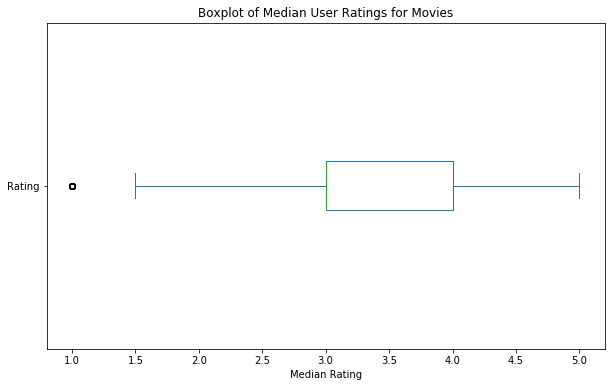

In [138]:
median_ratings = movieset.groupby('Title')['Rating'].median()

# Create a boxplot
plt.figure(figsize=(10, 6))
median_ratings.plot(kind='box', vert=False)
plt.xlabel('Median Rating')
plt.title('Boxplot of Median User Ratings for Movies')
plt.show()

## Number of ratings per user

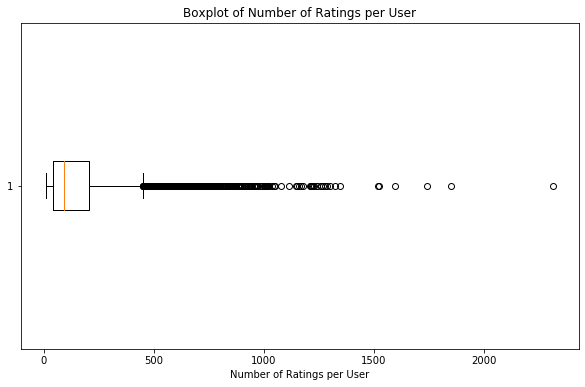

In [139]:
ratings_per_user = movieset.groupby('User_ID')['Rating'].count()

# Create a boxplot
plt.figure(figsize=(10, 6))
plt.boxplot(ratings_per_user, vert=False)
plt.xlabel('Number of Ratings per User')
plt.title('Boxplot of Number of Ratings per User')
plt.show()

## Average and Median ratings for Movies

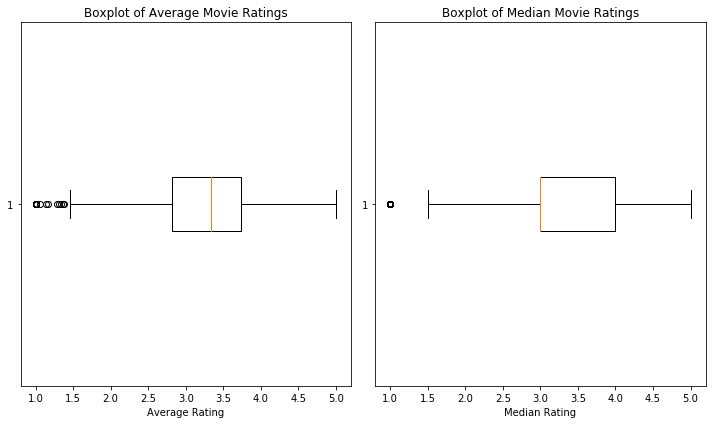

In [140]:
movie_ratings = movieset.groupby('Title')['Rating'].agg(['mean', 'median'])

# Create boxplots for average and median ratings
plt.figure(figsize=(10, 6))

# Boxplot for average ratings
plt.subplot(1, 2, 1)
plt.boxplot(movie_ratings['mean'], vert=False)
plt.xlabel('Average Rating')
plt.title('Boxplot of Average Movie Ratings')

# Boxplot for median ratings
plt.subplot(1, 2, 2)
plt.boxplot(movie_ratings['median'], vert=False)
plt.xlabel('Median Rating')
plt.title('Boxplot of Median Movie Ratings')

plt.tight_layout()
plt.show()

## Movies released in a particular year

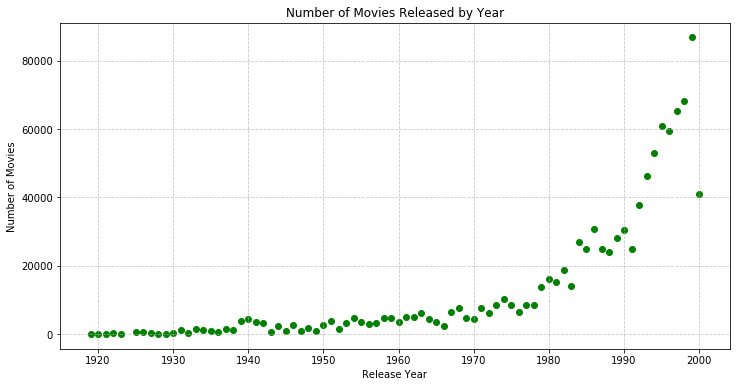

In [141]:
movieset['Release Year'] = movieset['Title'].str.extract(r'\((\d{4})\)')

# Convert 'Release Year' to numeric
movieset['Release Year'] = pd.to_numeric(movieset['Release Year'])

# Count the number of movies released in each year
movies_per_year = movieset.groupby('Release Year').size().reset_index(name='Number of Movies')

# Plotting the scatter plot
plt.figure(figsize=(12, 6))
plt.scatter(movies_per_year['Release Year'], movies_per_year['Number of Movies'], color='green')
plt.title('Number of Movies Released by Year')
plt.xlabel('Release Year')
plt.ylabel('Number of Movies')
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

## Average and Median ratings of movies realeased in a particular year

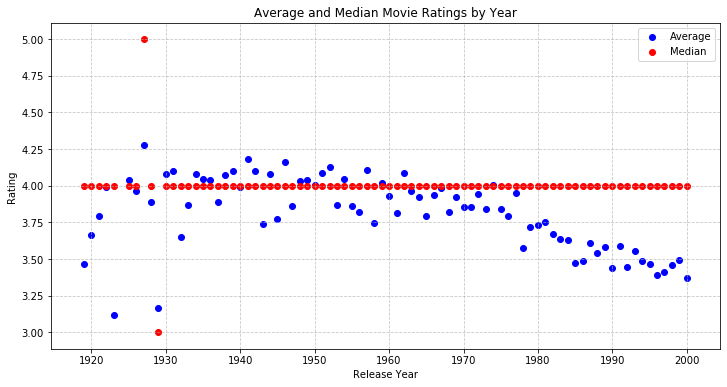

In [142]:
movieset['Release Year'] = movieset['Title'].str.extract(r'\((\d{4})\)')

# Convert 'Release Year' to numeric
movieset['Release Year'] = pd.to_numeric(movieset['Release Year'])

# Group movies by release year and calculate average and median rating
avg_median_ratings = movieset.groupby('Release Year')['Rating'].agg(['mean', 'median']).reset_index()

# Plotting the scatter plot
plt.figure(figsize=(12, 6))
plt.scatter(avg_median_ratings['Release Year'], avg_median_ratings['mean'], color='blue', label='Average')
plt.scatter(avg_median_ratings['Release Year'], avg_median_ratings['median'], color='red', label='Median')
plt.title('Average and Median Movie Ratings by Year')
plt.xlabel('Release Year')
plt.ylabel('Rating')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

## Frequency of each genre in the dataset

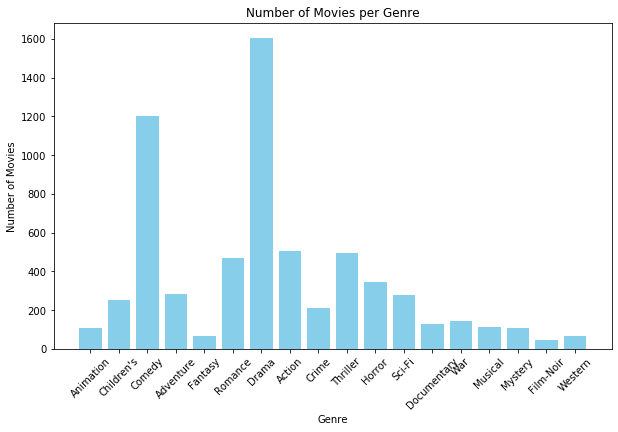

In [143]:
column_names = ['MovieID', 'Title', 'Genres']
movies_df = pd.read_csv("movies.dat", sep = "::", names = column_names, encoding='latin-1', engine='python')
genre_counts = {}
for genres in movies_df['Genres']:
    for genre in genres.split('|'):
        genre_counts[genre] = genre_counts.get(genre, 0) + 1

# Plotting
plt.figure(figsize=(10, 6))
plt.bar(genre_counts.keys(), genre_counts.values(), color='skyblue')
plt.xlabel('Genre')
plt.ylabel('Number of Movies')
plt.title('Number of Movies per Genre')
plt.xticks(rotation=45)
plt.show()

## Average ratings across genres

In [144]:
column_names = ['User_ID', 'MovieID', 'Rating', 'Timestamp']
ratings_df = pd.read_csv("ratings.dat", sep = "::", names = column_names, engine='python')
ratings_df = ratings_df.drop('Timestamp', axis = 1)

# Merge ratings and movies DataFrame on 'MovieID'
merged_df = pd.merge(ratings_df, movies_df, on='MovieID')

# Calculate the average rating per genre
genre_avg_ratings = {}
for index, row in merged_df.iterrows():
    genres = row['Genres'].split('|')
    for genre in genres:
        if genre not in genre_avg_ratings:
            genre_avg_ratings[genre] = [row['Rating']]
        else:
            genre_avg_ratings[genre].append(row['Rating'])

# Calculate average rating for each genre
for genre, rating in genre_avg_ratings.items():
    avg_rating = sum(rating) / len(rating)
    genre_avg_ratings[genre] = avg_rating

# Convert dictionary to DataFrame
genre_avg_ratings_df = pd.DataFrame(list(genre_avg_ratings.items()), columns=['Genre', 'Average Rating'])

# Plotting scatterplot
plt.figure(figsize=(10, 6))
plt.scatter(genre_avg_ratings_df['Genre'], genre_avg_ratings_df['Average Rating'], color='skyblue')
plt.xlabel('Genre')
plt.ylabel('Average Rating')
plt.title('Average Rating per Genre')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

# Preprocessing

In [145]:
movie_ratings = pd.DataFrame(movieset.groupby('Title')['Rating'].mean())
movie_ratings['Number of Ratings'] = movieset.groupby('Title')['Rating'].count()
movie_ratings.sort_values(by=['Number of Ratings'])

,Rating,Number of Ratings
Title,,
Elstree Calling (1930),1.000000,1
Cheetah (1989),1.000000,1
Shadows (Cienie) (1988),1.000000,1
"Superweib, Das (1996)",2.000000,1
Happy Weekend (1996),2.000000,1
...,...,...
Jurassic Park (1993),3.763847,2672
Star Wars: Episode VI - Return of the Jedi (1983),4.022523,2886
Star Wars: Episode V - The Empire Strikes Back (1980),4.292977,2990


## Function to define our movie-user interaction matrix we use in the below methods

In [146]:
def interactionmatrix(dataset, User_ID, Title, Rating):
    movie_user_interact = dataset.pivot_table(index = User_ID, columns = Title, values = Rating).fillna(0)
    return movie_user_interact

In [147]:
movie_user = interactionmatrix(movieset, 'User_ID', 'MovieID', 'Rating')
movie_user

MovieID,1,2,3,4,5,6,7,8,9,10,...,3943,3944,3945,3946,3947,3948,3949,3950,3951,3952
User_ID,,,,,,,,,,,,,,,,,,,,,
1,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6042,5.0,0.0,0.0,0.0,0.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6043,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6044,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


## Calculating User Bias

In [148]:
avg_ratings = pd.DataFrame(movieset.groupby('User_ID')['Rating'].mean())
avg_ratings.rename(columns = {'Rating':'AvgRating'}, inplace = True) 
avg_ratings.sort_values('User_ID', inplace=True)
avg_ratings.head()

,AvgRating
User_ID,
1,4.188679
2,3.713178
3,3.901961
4,4.190476
5,3.146465


# User-User based collaborative filtering - Pearson's Correlation

1. Find pairs of users:
    * Group users by those that have watched atleast one movie the target user has watched.   
    
2. Compute Similarity:
    * Calculate the Pearson correlation coefficient between each pair of users based on their ratings.
    * Return the similarity index for each valid user-user pair

2. Find closest users:
    * Select top 50 users that are closest to target user.
    * These neighbors are users whose ratings are most similar to the target user.

3. Predict Ratings:
    For each movie not yet rated by the target user:
    * Predict the rating by taking a weighted average of ratings from similar users.
    * Weight each neighbor's rating by their correlation coefficient with the target user.
    * Normalize the ratings by subtracting the user's mean rating to handle biases.
    
4. Recommendation:
    * Recommend the top-rated movies to the target user based on the predicted ratings.
    * Sort the predicted ratings and recommend the movies with the highest scores.

### Defining our version of inverse document frequency - Assigning unique weights to movies based on a skewed gaussian

In [149]:
watchFreq = movieset.groupby('MovieID')['Rating'].agg(['count', 'mean']).rename(columns={'count': 'Freq', 'mean': 'AvgMovieRating'})
watchFreq.sort_values('Freq', inplace=True, ascending = False)
watchFreq.head()

,Freq,AvgMovieRating
MovieID,,
2858,3428,4.317386
260,2992,4.453209
1196,2990,4.292977
1210,2886,4.022523
480,2672,3.763847


In [150]:
watchFreq['Freq'].median()

123.5

0.9830375239538252


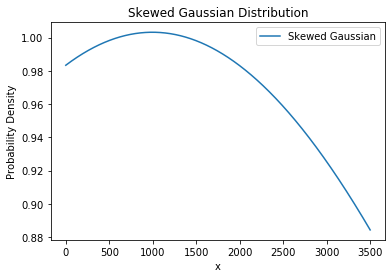

In [151]:
def skewed_gaussian_value(x, mean = 600, std_dev = 5000, skewness = 0.1):
    t = (x - mean) / std_dev
    #return 1
    return np.exp(-0.5 * t**2) * (1 + math.erf(skewness * t / np.sqrt(2)))

print(skewed_gaussian_value(2000))

# Generate x values
x_values = np.linspace(0, 3500, 3000)

# Calculate corresponding y values for skewed Gaussian
y_values = np.vectorize(lambda x: skewed_gaussian_value(x))(x_values)

# Plot the skewed Gaussian distribution
plt.plot(x_values, y_values, label='Skewed Gaussian')
plt.title('Skewed Gaussian Distribution')
plt.xlabel('x')
plt.ylabel('Probability Density')
plt.legend()
plt.show()

In [152]:
watchFreq['weight'] = watchFreq["Freq"].apply(skewed_gaussian_value)
watchFreq.sort_values('weight', inplace=True, ascending = False)
watchFreq.head()

,Freq,AvgMovieRating,weight
MovieID,,,
551,996,3.717871,1.003168
1909,996,3.492972,1.003168
1266,997,4.090271,1.003168
3897,994,4.226358,1.003168
1372,1001,3.409590,1.003168


### Define our implementation of Pearsons Correlation

In [153]:
def get_pearson_corr(userSubsetGroup, inputMovie):
    global watchFreq
    #Sorting it so users with movie most in common with the input will have priority
    userSubsetGroup = sorted(userSubsetGroup,  key=lambda x: len(x[1]), reverse=True)
    
    #Store the Pearson Correlation in a dictionary, where the key is the user Id and the value is the coefficient
    pearsonCorDict = {}

    #For every user group in our subset
    for name, group in userSubsetGroup:
        #sorting the input and current user group so the values aren't mixed up later on
        group = group.sort_values(by='MovieID')
        inputMovie = inputMovie.sort_values(by='MovieID')
        watchFreq = watchFreq.sort_index()
        
        #Get the N for the formula
        n = len(group)
        
        #Get the review scores for the movies that they both have in common
        temp = inputMovie[inputMovie['MovieID'].isin(group['MovieID'].tolist())]
        
        #Get the weights corresponding to the movies
        weights = watchFreq[watchFreq.index.isin(group['MovieID'].tolist())]
        weightList = weights['weight'].tolist()
        
        #And then store them in a temporary buffer variable in a list format to facilitate future calculations
        tempRatingList = temp['Rating'].tolist()
        
        #put the current user group reviews in a list format
        tempGroupList = group['Rating'].tolist()
        
        #Now let's calculate the pearson correlation between two users, so called, x and y
        Sxx = sum([i**2 for i in tempRatingList]) - pow(sum(tempRatingList),2)/float(n)
        Syy = sum([i**2 for i in tempGroupList]) - pow(sum(tempGroupList),2)/float(n)
        Sxy = sum( i*j*w for i, j, w in zip(tempRatingList, tempGroupList, weightList)) - sum(tempRatingList)*sum(tempGroupList)/float(n)

        #If the denominator != zero, then divide else, 0 correlation.
        if Sxx != 0 and Syy != 0:
            pearsonCorDict[name] = Sxy/math.sqrt(Sxx*Syy)
        else:
            pearsonCorDict[name] = 0
    return pearsonCorDict
    
    

### Returns the list of top users similar to a given user

In [154]:
def find_similar_users(movie_user, target_user_id, weighted = False):
    #define profile of the user
    target_user = []
    movie_id = 1
    
    #finding the movie ids of all movies target user has watched
    for idx, movie_rating in movie_user.iloc[target_user_id - 1].items():
        if movie_rating > 0:
            target_user.append([idx, movies.loc[movies['MovieID'] == idx,'Title'].values[0], movie_rating])
        movie_id += 1
    
    #convert profile to df
    inputMovie = pd.DataFrame(target_user, columns = ['MovieID', 'Title', 'Rating'])
    
    print(inputMovie)
    
    #list of all users that have watched the same movies as target user
    similar_users = ratings[ratings['MovieID'].isin(inputMovie['MovieID'])]
    
    #groupby creates subgroups based on param specified
    userSubsetGroup = similar_users.groupby(['User_ID'])
    
    #get the map of similar users to similarity index
    pearson_corr = get_pearson_corr(userSubsetGroup, inputMovie)
    
    #construct DF for each pair of user, similarity values
    pearson = []
    for user, sim in pearson_corr.items():
        user_ = list(user)
        pearson.append([user_[0], sim])
        
    pearsonDF = pd.DataFrame(pearson, columns = ['User_ID', 'similarityIndex'])
    
    #get top 50 users based on similarity 
    topUsers=pearsonDF.sort_values(by='similarityIndex', ascending=False)[:50]
    
    return topUsers

In [155]:
ratings['MovieID']

0          1193
1           661
2           914
3          3408
4          2355
           ... 
1000320     318
1000321     541
1000322     924
1000323    1221
1000324    1237
Name: MovieID, Length: 1000325, dtype: int64

### Enter the target user id here

In [156]:
#Enter the target user id you want to recommend movies to
target_user_id = 6045
top_similar_users = find_similar_users(movie_user, target_user_id)
top_similar_users.head()

    MovieID                                           Title  Rating
0        56                  Kids of the Round Table (1995)     4.0
1       172                          Johnny Mnemonic (1995)     5.0
2       320                                   Suture (1993)     5.0
3       427                            Boxing Helena (1993)     4.0
4       512  Robert A. Heinlein's The Puppet Masters (1994)     5.0
5       516                          Renaissance Man (1994)     4.0
6       967                              Outlaw, The (1943)     5.0
7      1389                                 Jaws 3-D (1983)     4.0
8      1562                           Batman & Robin (1997)     5.0
9      1888                              Hope Floats (1998)     5.0
10     2145                           Pretty in Pink (1986)     4.0
11     2724                            Runaway Bride (1999)     4.0
12     3287                        Tigger Movie, The (2000)     5.0
13     3315                          Happy Go Lo

,User_ID,similarityIndex
624,2153,1.038930
772,4153,1.025583
492,494,1.020253
873,5387,1.014027
632,2223,1.009578


#### Now that we have the most similar users given a target user, we will find the weighted average of the movies using Pearsons correlation and our novel defined weights

In [157]:
top_similar_users['User_ID'] = top_similar_users['User_ID'].astype('int64')

In [158]:
#to get weighted average we first need ratings of all the movies the top users have watched
topUsersRating = top_similar_users.merge(ratings, left_on='User_ID', right_on='User_ID', how='inner')
topUsersRating = topUsersRating.merge(avg_ratings, left_on='User_ID', right_on='User_ID', how='inner')
topUsersRating = topUsersRating.merge(watchFreq, left_on='MovieID', right_on='MovieID', how='inner')
topUsersRating.head()

,User_ID,similarityIndex,MovieID,Rating,AvgRating,Freq,AvgMovieRating,weight
0,2153,1.038930,2987,5,3.852691,1799,3.679822,0.990247
1,5387,1.014027,2987,2,3.547196,1799,3.679822,0.990247
2,2223,1.009578,2987,5,3.089015,1799,3.679822,0.990247
3,284,0.969330,2987,4,3.021231,1799,3.679822,0.990247
4,3529,0.959233,2987,3,3.035242,1799,3.679822,0.990247


In [159]:
#Multiplies the similarity by the user's ratings
topUsersRating['weightedRating'] = topUsersRating['similarityIndex']*(topUsersRating['Rating'] - topUsersRating['AvgRating'])
topUsersRating['modSim'] = abs(topUsersRating['similarityIndex'])
topUsersRating.head()

,User_ID,similarityIndex,MovieID,Rating,AvgRating,Freq,AvgMovieRating,weight,weightedRating,modSim
0,2153,1.038930,2987,5,3.852691,1799,3.679822,0.990247,1.191973,1.038930
1,5387,1.014027,2987,2,3.547196,1799,3.679822,0.990247,-1.568898,1.014027
2,2223,1.009578,2987,5,3.089015,1799,3.679822,0.990247,1.929289,1.009578
3,284,0.969330,2987,4,3.021231,1799,3.679822,0.990247,0.948750,0.969330
4,3529,0.959233,2987,3,3.035242,1799,3.679822,0.990247,-0.033806,0.959233


### Apply the formula to calculate predicting rating and return the top K movies accordingly

In [160]:
#Applies a sum to the topUsers after grouping it up by userId
tempTopUsersRating = topUsersRating.groupby('MovieID').sum()[['modSim','weightedRating']]
tempTopUsersRating.columns = ['sum_similarityIndex','sum_weightedRating']
tempTopUsersRating.sort_values("sum_similarityIndex", inplace=True, ascending = True)
tempTopUsersRating.head()

,sum_similarityIndex,sum_weightedRating
MovieID,,
2330,0.824149,0.897889
2731,0.824149,0.897889
728,0.824149,-0.750409
3718,0.824149,0.897889
3625,0.824149,0.897889


In [161]:
#Creates an empty dataframe
recommendation_df = pd.DataFrame()

#Now we take the weighted average
tempTopUsersRating['weighted average recommendation score'] = avg_ratings.iloc[target_user_id-1]['AvgRating'] + tempTopUsersRating['sum_weightedRating']/tempTopUsersRating['sum_similarityIndex']
tempTopUsersRating.head()

,sum_similarityIndex,sum_weightedRating,weighted average recommendation score
MovieID,,,
2330,0.824149,0.897889,5.622807
2731,0.824149,0.897889,5.622807
728,0.824149,-0.750409,3.622807
3718,0.824149,0.897889,5.622807
3625,0.824149,0.897889,5.622807


## Generate final recommendations

In [162]:
#Top k movies recommended to user
k = 10

recommendation_df = tempTopUsersRating.sort_values(by='weighted average recommendation score', ascending=False)
recommendation_df.head(k)

,sum_similarityIndex,sum_weightedRating,weighted average recommendation score
MovieID,,,
106,0.929432,1.977905,6.661412
523,0.929432,1.977905,6.661412
1759,0.929432,1.977905,6.661412
649,0.929432,1.977905,6.661412
2673,0.929432,1.977905,6.661412
1369,0.929432,1.977905,6.661412
670,0.929432,1.977905,6.661412
583,0.929432,1.977905,6.661412
729,0.929432,1.977905,6.661412


In [163]:
output = movies.loc[movies['MovieID'].isin(recommendation_df.head(k).index.tolist())]
output = output.merge(recommendation_df, left_on='MovieID', right_on='MovieID', how='inner')
output.sort_values('weighted average recommendation score', inplace=True, ascending=False)
output.drop(columns = ['sum_similarityIndex', 'sum_weightedRating'], inplace = True)
output = output.merge(watchFreq, left_on='MovieID', right_on='MovieID', how='inner')
output

,MovieID,Title,Genre 1,Genre 2,Genre 3,Genre 4,Genre 5,Genre 6,weighted average recommendation score,Freq,AvgMovieRating,weight
0,106,Nobody Loves Me (Keiner liebt mich) (1994),Comedy,Drama,None,None,None,None,6.661412,12,3.583333,0.983791
1,523,Ruby in Paradise (1993),Drama,None,None,None,None,None,6.661412,117,3.658120,0.987674
2,583,Dear Diary (Caro Diario) (1994),Comedy,Drama,None,None,None,None,6.661412,28,3.678571,0.984410
3,649,Cold Fever (Á köldum klaka) (1994),Comedy,Drama,None,None,None,None,6.661412,16,4.187500,0.983946
4,670,"World of Apu, The (Apur Sansar) (1959)",Drama,None,None,None,None,None,6.661412,56,4.410714,0.985469
5,729,"Institute Benjamenta, or This Dream People Cal...",Drama,None,None,None,None,None,6.661412,3,3.666667,0.983438
6,1369,I Can't Sleep (J'ai pas sommeil) (1994),Drama,Thriller,None,None,None,None,6.661412,5,3.800000,0.983517
7,1759,Four Days in September (1997),Drama,None,None,None,None,None,6.661412,51,3.980392,0.985282
8,2673,Eternity and a Day (Mia eoniotita ke mia mera ...,Drama,None,None,None,None,None,6.661412,7,3.857143,0.983595
9,3880,"Ballad of Ramblin' Jack, The (2000)",Documentary,None,None,None,None,None,6.661412,18,3.500000,0.984024


# Item-Item based Collabrative Filtering using KNN

The algorithm for this will be as follows:
* Calculate similarity between movies using KNN.
* For each movie a user has not watched, predict the rating: for a movie not watched by a user
    1. For this, we find the closest movies based on similarity from previous step and calculate the weighted average of the ratings.
    2. The weight used will be inverse of the distance of how close one movie is to the other
* Recommend movies which have highest predicted rating

In [52]:
movie_user = interactionmatrix(movieset,'MovieID', 'User_ID','Rating')
movie_user

User_ID,1,2,3,4,5,6,7,8,9,10,...,6037,6038,6039,6040,6041,6042,6043,6044,6045,6046
MovieID,,,,,,,,,,,,,,,,,,,,,
1,5.0,0.0,0.0,0.0,0.0,4.0,0.0,4.0,5.0,5.0,...,0.0,0.0,0.0,3.0,5.0,5.0,1.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3948,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,4.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3949,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3950,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


## Implementing KNN class

In [53]:
def euclidean_norm(a):
    """
    Compute the Euclidean norm of a vector.

    Parameters:
    a (array_like): The input vector.

    Returns:
    float: The Euclidean norm of the vector.
    """
    # Compute the sum of squares of each element
    sum_of_squares = np.sum(a ** 2)
    
    # Take the square root of the sum of squares
    norm = np.sqrt(sum_of_squares)
    
    return norm

In [54]:
def cosine_similarity(a, b):
    dot_product = np.dot(a, b)
    norm_a = euclidean_norm(a)
    norm_b = euclidean_norm(b)
    similarity = dot_product / (norm_a * norm_b)
    return similarity



In [55]:
class KNN:
    def __init__(self, k=5):
        self.k = k

    def fit(self, X):
        self.X_train = X

    def kneighbors(self, X_test):
        neighbors_indices = []
        neighbors_distances = []
        for sample in X_test:
            distances = []
            for x_train in self.X_train:
                distance = 1 - cosine_similarity(sample, x_train)
                distances.append(distance)
            # Get indices of k nearest neighbors
            indices = np.argsort(distances)[:self.k]
            neighbors_indices.append(indices)
            neighbors_distances.append([distances[i] for i in indices])
        return np.array(neighbors_distances), np.array(neighbors_indices)


## Setting the k value and running KNN

In [56]:
knn = KNN(3)
knn.fit(movie_user.values)
distances, indices = knn.kneighbors(movie_user.values)

**distances** shows the distance between movies. Each number in this matrix corresponds to the number in the indices matrix.

In [57]:
print(distances)

[[ 0.00000000e+00  3.67329504e-01  3.89591845e-01]
 [-2.22044605e-16  4.28296384e-01  4.98246190e-01]
 [-2.22044605e-16  4.55672935e-01  6.49557798e-01]
 ...
 [ 0.00000000e+00  6.97350943e-01  7.18036450e-01]
 [-2.22044605e-16  6.75517797e-01  7.03587337e-01]
 [ 0.00000000e+00  5.43162034e-01  5.69980994e-01]]


**indices** shows the nearest movies to each movie. Each row corresponds to the row in the df. The first element in a row is the most similar (nearest) movie. It is the movie itself. The second element is the second nearest, and the third is the third nearest.

In [63]:
print(indices)

[[   0 2898 1173]
 [   1 3256  632]
 [   2 3218  573]
 ...
 [3703 3702 2564]
 [3704 3668 2974]
 [3705 3651 3647]]


## Building our recommender

In [64]:
def recommenderKNN(target_user_id):
    neighbours = 3
    
    prediction_matrix = movie_user.copy()
    
    for i, movieid in list(enumerate(movie_user.index)):
        
        #find all the movies target user has not watched
        if movie_user.iloc[i, target_user_id - 1] == 0:
            similar_movies = indices[i].tolist()
            movie_distances = distances[i].tolist()
            
            #if this movie is itself in the closest neighbours then remove it
            if i in similar_movies:
                id_movie = similar_movies.index(i)
                similar_movies.remove(i)
                movie_distances.pop(id_movie)
                
            # However, if the percentage of ratings in the dataset is very low, there are too many 0s in the dataset. 
            # Some movies have all 0 ratings and the movies with all 0s are considered the same movies by NearestNeighbors(). 
            # Then,even the movie itself cannot be included in the indices. So we remove the last one
            else:
                similar_movies = similar_movies[:neighbours - 1]
                movie_distances = movie_distances[:neighbours - 1]
            
            #movie_similarty = 1 - movie_distance    
            movie_similarity = [1 - x for x in movie_distances]
            movie_similarity_copy = movie_similarity.copy()
            nominator = 0
            
            
            # for each similar movie
            for s in range(0, len(movie_similarity)):
                # check if the rating of a similar movie is zero
                if movie_user.iloc[similar_movies[s], target_user_id - 1] == 0:
                     # if the rating is zero, ignore the rating and the similarity in calculating the predicted rating
                    if len(movie_similarity_copy) == (neighbours - 1):
                          movie_similarity_copy.pop(s)
                            
                    else:
                        movie_similarity_copy.pop(s-(len(movie_similarity)-len(movie_similarity_copy)))

                # if the rating is not zero, use the rating and similarity in the calculation
                else:
                    nominator = nominator + movie_similarity[s]*movie_user.iloc[similar_movies[s],target_user_id - 1]
            
            
             # check if the number of the ratings with non-zero is positive
            if len(movie_similarity_copy) > 0:
                
              # check if the sum of the ratings of the similar movies is positive.
                if sum(movie_similarity_copy) > 0:
                    predicted_r = nominator / sum(movie_similarity_copy)

              # Even if there are some movies for which the ratings are positive, some movies have zero similarity even though they are selected as similar movies.
              # in this case, the predicted rating becomes zero as well  
                else:
                    predicted_r = 0

            # if all the ratings of the similar movies are zero, then predicted rating should be zero
            else:
                predicted_r = 0

              # place the predicted rating into the copy of the original dataset
            prediction_matrix.iloc[i,target_user_id - 1] = predicted_r
            
    return prediction_matrix

## Enter target user id to obtain prediction matrix

In [110]:
target_user_id = 6045
top_k = 10

prediction_matrix = recommenderKNN(target_user_id)

### The above function call fills the prediction matrix for a target user, now we process the tables to extract top k movies as per the predicted rating

In [111]:
recommended_movies = []
    
for movie in movie_user[movie_user[target_user_id] == 0].index.tolist():
        
    index_df = movie_user.index.tolist().index(movie)
    predicted_rating = prediction_matrix.iloc[index_df, prediction_matrix.columns.tolist().index(target_user_id)]
    recommended_movies.append((movie, predicted_rating))
        
#sort in descending order based on predicted rating
recommendation_df = pd.DataFrame(recommended_movies, columns = ['MovieId', 'Predicted_Rating'])
recommendation_df = recommendation_df.sort_values(by = 'Predicted_Rating',ascending = False)
recommendation_df.head()

,MovieId,Predicted_Rating
325,338,5.0
187,195,5.0
1738,1928,5.0
175,183,5.0
314,327,5.0


In [112]:
output = movies.loc[movies['MovieID'].isin(recommendation_df.head(top_k)['MovieId'].tolist())]
output = output.merge(recommendation_df, left_on='MovieID', right_on='MovieId', how='inner')
output.sort_values('Predicted_Rating', inplace = True, ascending = False)
output = output.merge(watchFreq, left_on='MovieID', right_on='MovieID', how='inner')
output

,MovieID,Title,Genres,MovieId,Predicted_Rating,Freq,AvgMovieRating,weight
0,338,Virtuosity (1995),Sci-Fi|Thriller,338,5.0,221,2.882353,0.991101
1,183,Mute Witness (1994),Thriller,183,5.0,29,3.482759,0.984448
2,195,Something to Talk About (1995),Comedy|Drama|Romance,195,5.0,164,2.841463,0.989274
3,207,"Walk in the Clouds, A (1995)",Drama|Romance,207,5.0,219,3.132420,0.991039
4,327,Tank Girl (1995),Action|Comedy|Musical|Sci-Fi,327,5.0,358,2.614525,0.994972
5,691,Mrs. Winterbourne (1996),Comedy|Romance,691,5.0,121,3.099174,0.987813
6,1830,Follow the Bitch (1998),Comedy,1830,5.0,1,5.000000,0.983360
7,1928,Cimarron (1931),Western,1928,5.0,29,3.379310,0.984448
8,3436,Dying Young (1991),Drama|Romance,3436,5.0,128,2.789062,0.988056
9,3625,Better Living Through Circuitry (1999),Documentary,3625,5.0,16,3.812500,0.983946
